# Práctica 6 - Clasificador de imágenes con perceptrón

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para la práctica con el nombre NIP_P6_MLP.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook)

Imports necesarios para ejecutar el trabajo

In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()

    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [3]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
11490434/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [4]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Con dos capas:

In [5]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(),  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                39250     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 4s 5ms/step - loss: 0.0257 - accuracy: 0.8393 - val_loss: 0.0142 - val_accuracy: 0.9117
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0125 - accuracy: 0.9209 - val_loss: 0.0114 - val_accuracy: 0.9258
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0104 - accuracy: 0.9347 - val_loss: 0.0101 - val_accuracy: 0.9373
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0091 - accuracy: 0.9431 - val_loss: 0.0087 - val_accuracy: 0.9463
Epoch 5/20
422/422 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9488 - val_loss: 0.0080 - val_accuracy: 0.9508
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9545 - val_loss: 0.0075 - val_accuracy: 0.9547
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.9579 - val_loss: 0.0072 - val_accuracy: 0.9552
Epoch 

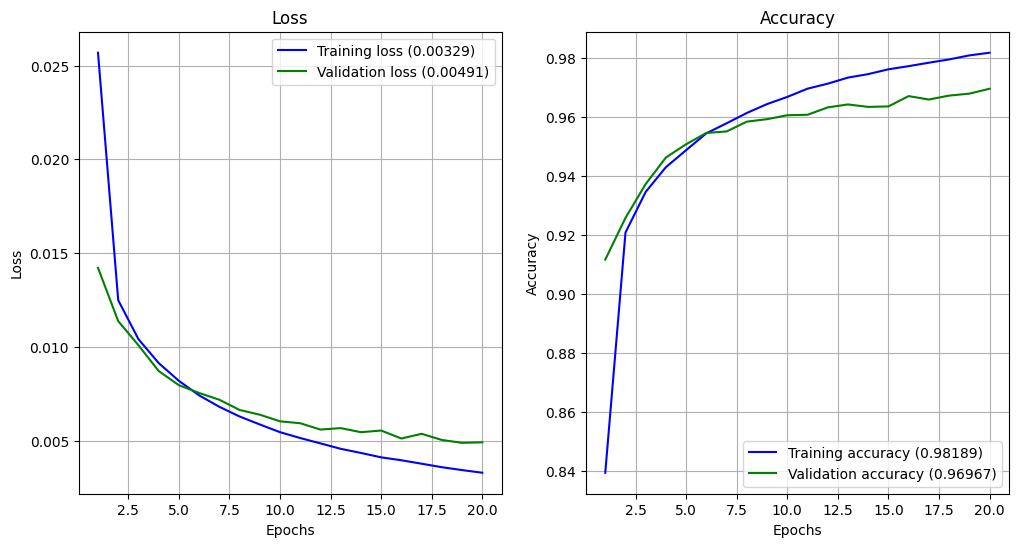

In [6]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

## Preguntas a responder de la celda anterior


### 1 - ¿Qué representan los parámetros batch_size y epochs? (Respuesta dos líneas max).

El parámetro batch_size representa la cantidad de instancias que se utilizan en cada iteración de actualización del modelo
durante el entrenamiento y el parámetro epochs es el número de iteraciones que se realizan sobre el conjunto de datos
durante el entrenamiento.


### 2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.

La gráfica de la izquierda mide el nivel de error del modelo. La línea azul representa los fallos en la fase de entrenamiento y la verde, los fallos en la fase de evaluación.

Si las líneas están muy pegadas, significa que el modelo realiza una buena generalización del conjunto de datos de evaluación, que son datos nuevos que no han sido entrenados. Si, por el contrario, están muy separadas, se da un sobreajuste. Esto se refiere a que el modelo se adapta demasiado a los datos de entrenamiento, llevando a un peor rendimiento en los datos de evaluación.


La gráfica de la derecha es la proporción de aciertos del modelo. La línea azul de entrenamiento empieza muy abajo, porque al principio hay fallos en la precisión del modelo. Sin embargo, acaba subiendo poniéndose a la par que la línea verde, que representa la evolución de la fase de evaluación.

Evaluación de la red

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  98.20%
Accuracy test:   97.03%
313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization


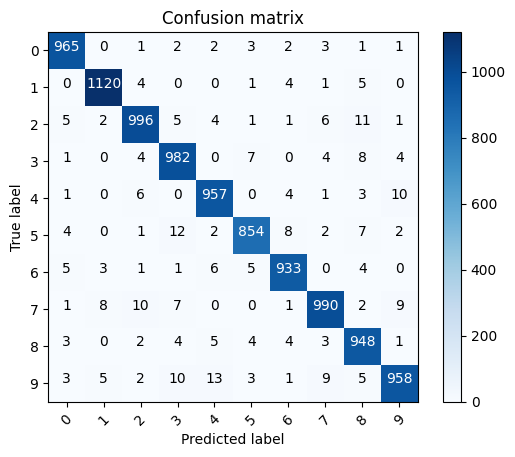

In [8]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

## Preguntas a responder de la celda anterior

### 3 - Explica la gráfica que se muestra

La gráfica se trata de una matriz de confusión, que sirve para evaluar la precisión de un modelo de clasificación mediante medidas de verdaderos y falsos positivos, y verdaderos y falsos negativos. Es decir, muestra la relación entre las predicciones y los resultados reales obtenidos por el modelo, para conocer el número de clasificaciones de datos correctas e incorrectas.

## TRABAJO PRÁCTICO


**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes.
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


4.1.   La mejor red obtenida para el caso de una capa

4.2.   La mejor red obtenida para el caso de dos capas

4.3.   La mejor red obtenida para el caso de tres capas

4.4.   Ejemplo de red en la que se produzca sobreajuste al entrenar

4.5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste

4.6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.

4.7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

CODIGO NECESARIO PARA RESPONDER LAS PREGUNTAS de la 4.1 a la 4.5

4.1. La mejor red obtenida para el caso de una capa:

entrenamiento

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.0290 - accuracy: 0.8311 - val_loss: 0.0174 - val_accuracy: 0.8975
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0156 - accuracy: 0.9058 - val_loss: 0.0145 - val_accuracy: 0.9127
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9154 - val_loss: 0.0134 - val_accuracy: 0.9158
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9203 - val_loss: 0.0128 - v

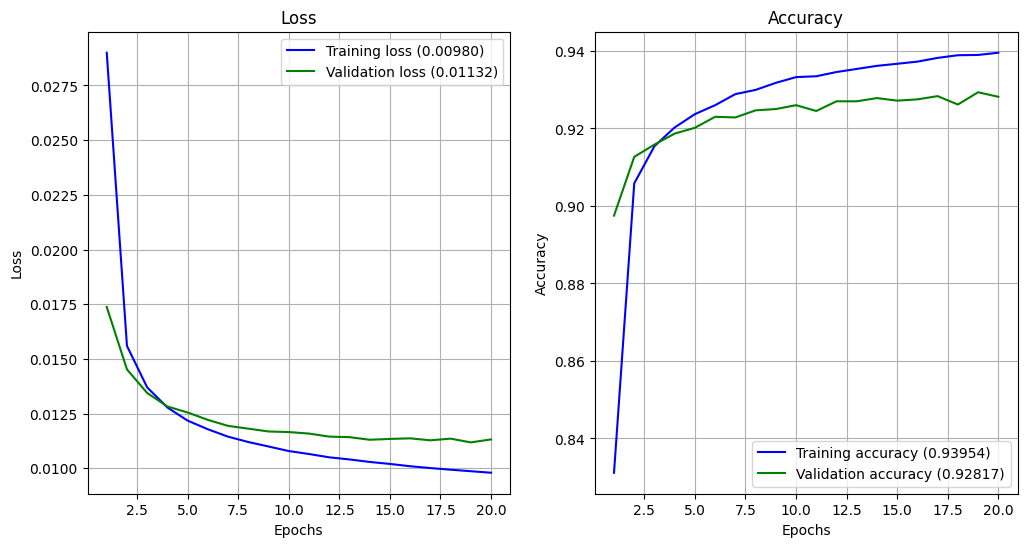

In [9]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='mean_squared_error', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[earlystop], verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

evaluación

Accuracy train:  93.98%
Accuracy test:   93.16%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


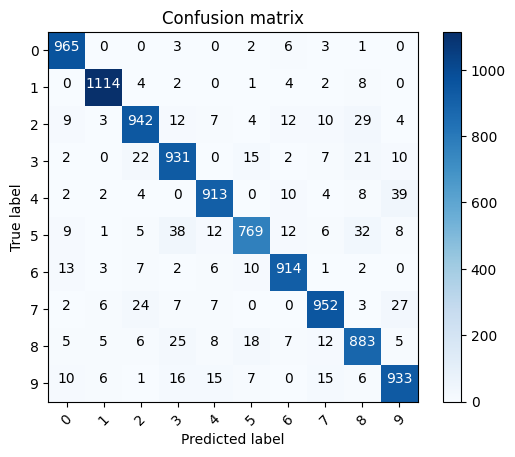

In [10]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

4.2. La mejor red obtenida para el caso de dos capas:

entrenamiento

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.8760 - val_loss: 0.0120 - val_accuracy: 0.9232
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0104 - accuracy: 0.9345 - val_loss: 0.0095 - val_accuracy: 0.9408
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0083 - accuracy: 0.9474 - val_loss: 0.0081 - val_acc

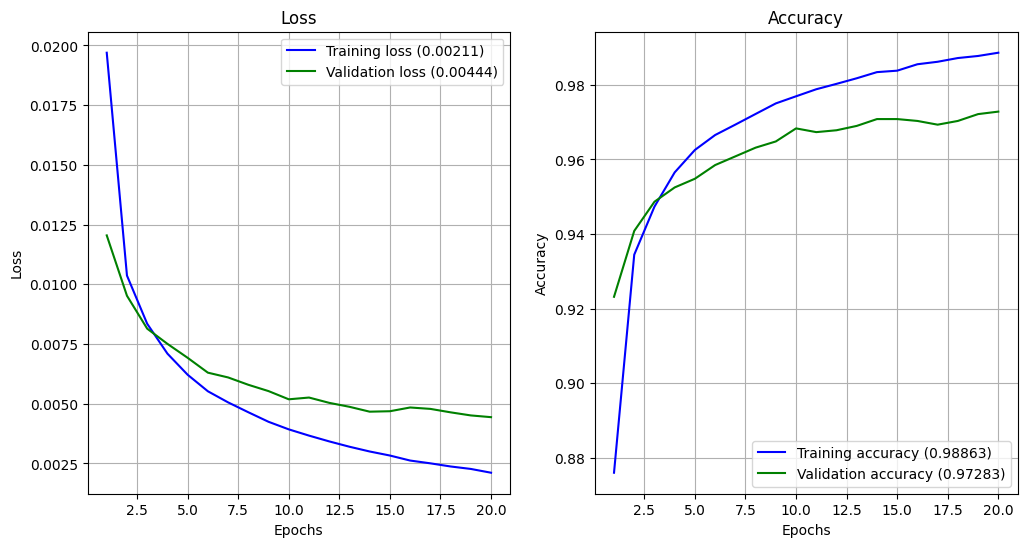

In [11]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[earlystop], verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

evaluación

Accuracy train:  98.86%
Accuracy test:   97.13%
313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization


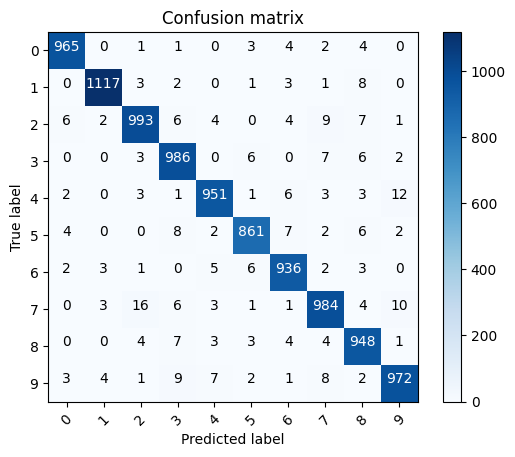

In [12]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

4.3. La mejor red obtenida para el caso de tres capas:

entrenamiento

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.4457 - accuracy: 0.8725 - val_loss: 0.2294 - val_accuracy: 0.9293
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1924 - accuracy: 0.9445 - val_loss: 0.1726 - val_accuracy: 0.9

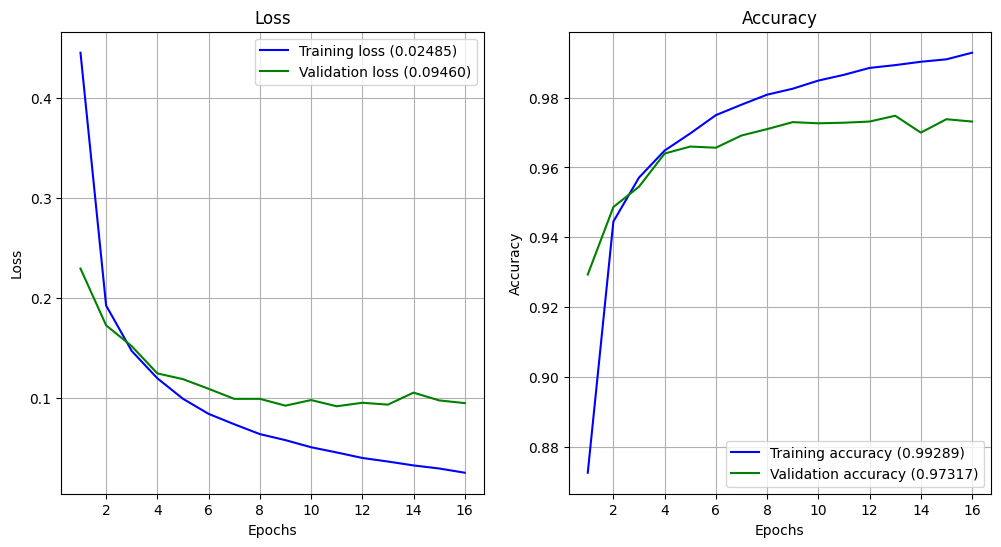

In [13]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[earlystop], verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

evaluación

Accuracy train:  99.26%
Accuracy test:   97.43%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


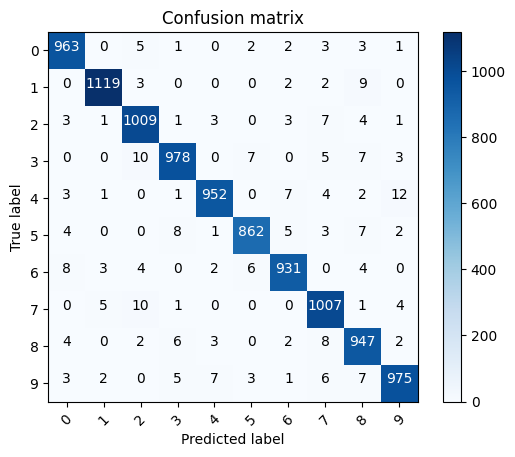

In [14]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

4.4. Ejemplo de red en la que se produzca sobreajuste al entrenar:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3000)              2355000   
                                                                 
 dense_10 (Dense)            (None, 300)               900300    
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 3258310 (12.43 MB)
Trainable params: 3258310 (12.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 4s 5ms/step - loss: 0.2303 - accuracy: 0.9316 - val_loss: 0.1219 - val_accuracy: 0.9607
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0727 - val_accuracy: 0

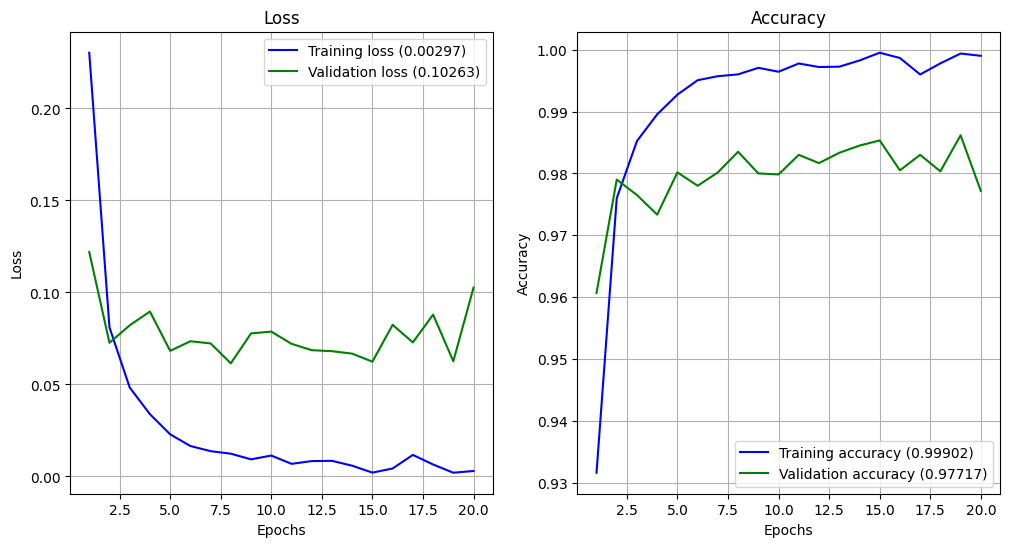

In [15]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(3000, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(300, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, #callbacks=[earlystop],
                    verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

4.5. Modificación de la red anterior utilizando técnicas para evitar el sobreajuste

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3000)              2355000   
                                                                 
 dense_13 (Dense)            (None, 300)               900300    
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 3258310 (12.43 MB)
Trainable params: 3258310 (12.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.2246 - accuracy: 0.9328 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0796 - accuracy: 0.9759 - val_loss: 0.0802 - val_accuracy: 0

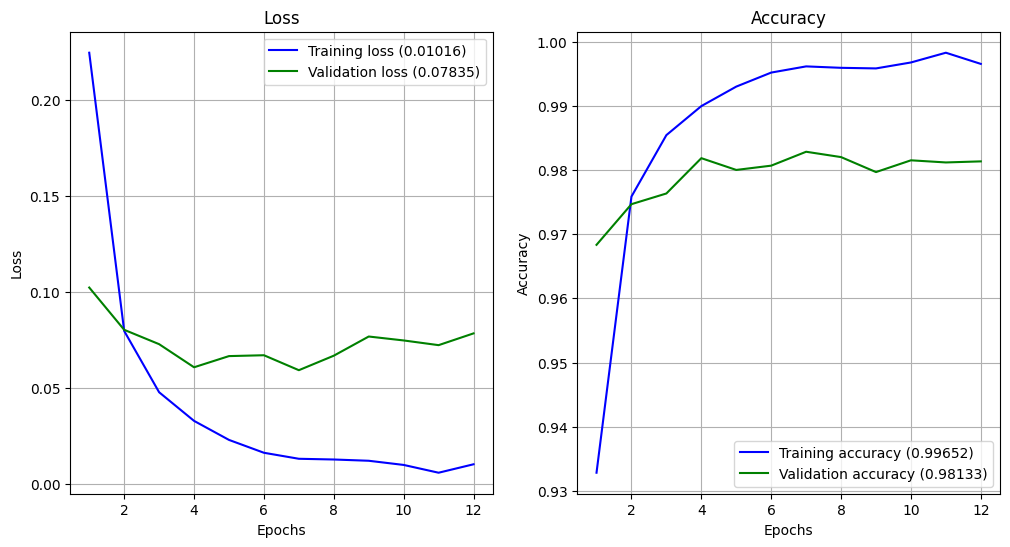

In [16]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(3000, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(300, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[earlystop],
                    verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

4.7. Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                39250     
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.4540 - accuracy: 0.8731 - val_loss: 0.2539 - val_accuracy: 0.9242
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1907 - accuracy: 0.9443 - val_loss: 0.1699 - val_accuracy: 0.9

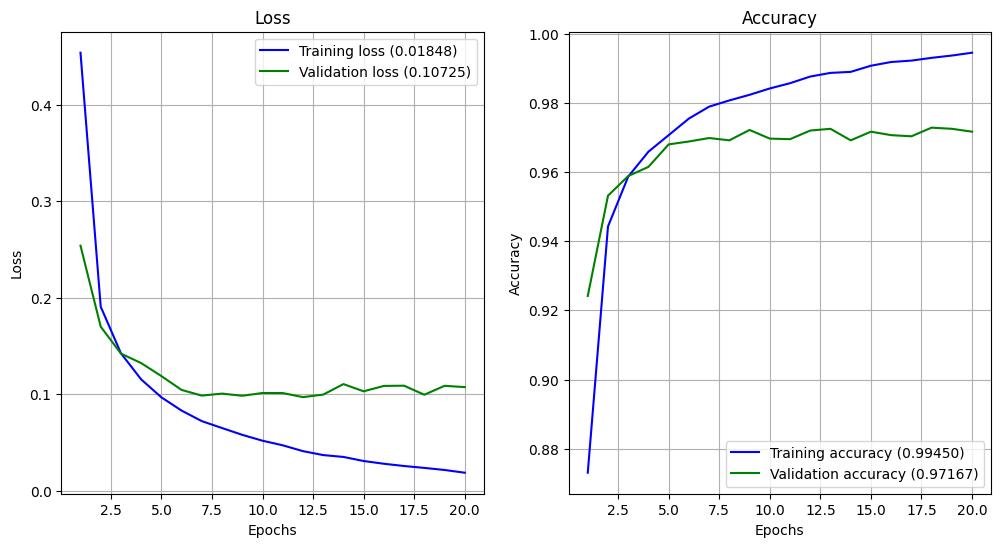

Accuracy train:  99.39%
Accuracy test:   97.16%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


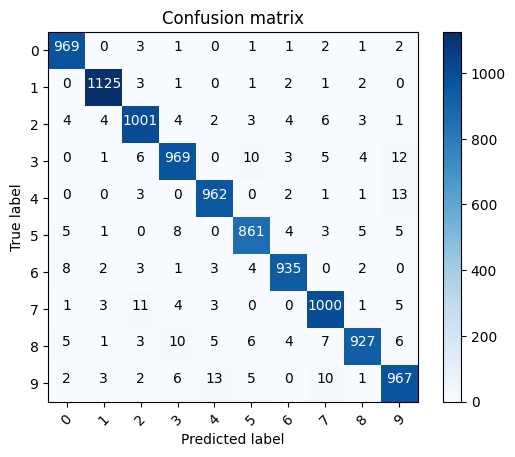

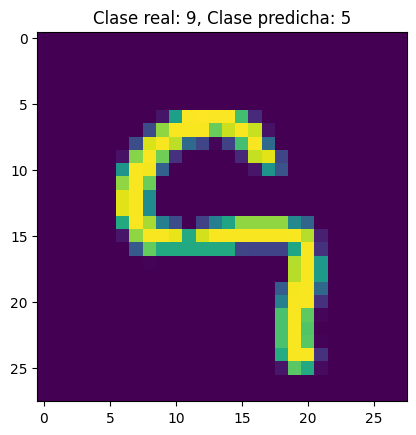

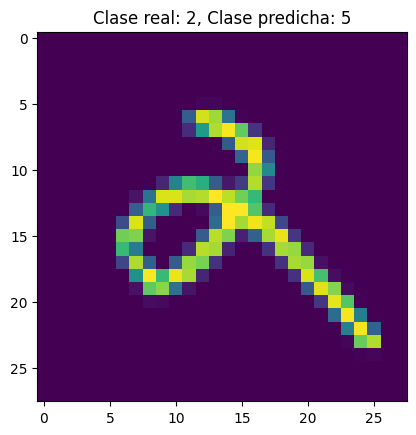

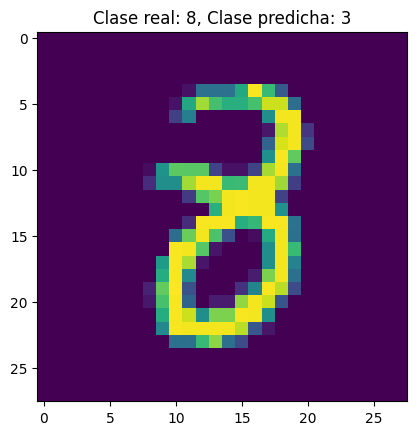

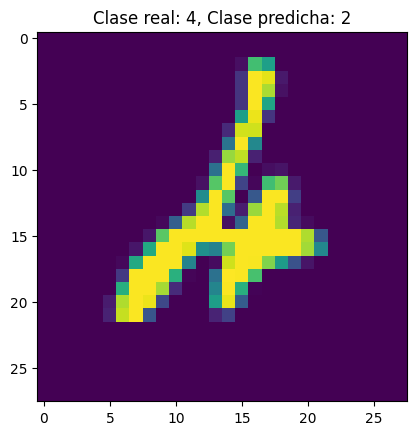

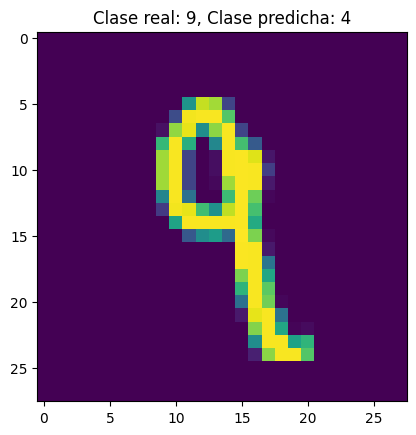

In [17]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

t0 = time.perf_counter()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, #callbacks=[earlystop],
                    verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

    # Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

#Buscar imagen clasificada incorrectamente

num = 0
for i in range(len(x_test)):
  if np.argmax(y_pred[i]) != np.argmax(y_test[i]):
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Clase real: " +str(np.argmax(y_test[i])) + ", Clase predicha: "
    + str(np.argmax(y_pred[i])))
    plt.show()
    num = num +1
    if num == 5:
      break

